# 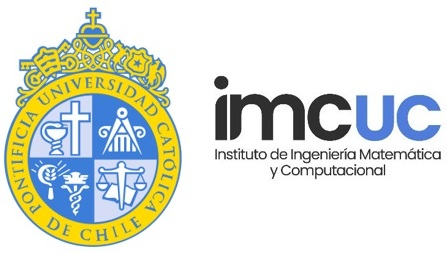  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 07: Actividad de Integración</center></h1>

Esta actividad busca que conecten el trabajo de agrupación y resumen, junto con el poder resumir estadísticas y visualización básica.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 07". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. 
    
**La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Para esta actividad usaremos una base de datos de calidad de vino generada por Crtex et al. para su paper "Modeling wine preferences by data mining from physicochemical properties". Pueden encontrar el paper acá: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub.

En la carpeta `data` están los dos archivos de datos, que fueron donados al repositorio de datos para Machine Learning de UC Irvine (https://archive.ics.uci.edu/dataset/186/wine+quality), además de un archivo de texto que explica algunos detalles de los datos disponibles en los archivos `.csv`.

## Rúbrica

- Si han logrado el punto 1: 3.0
- Si han logrado hasta el punto 2: 5.0
- Si han logrado hasta el punto 3 en forma parcial: 6.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos unificada

### 1.1 Lectura
Lea cada uno de los dos archivos `.csv` de la carpeta, dejando la información en un DataFrame para cada uno. Antes de hacer esto no olvide revisar el archivo CSV para ver el tipo de separador que se usa.

### 1.2 Revisión inicial
Revise qué tipos de datos tiene cada columna y asegúrese que sea el tipo adecuado. ¿Hay datos faltantes o nulos?

### 1.3 Base unificada
Junte ambos DataFrames en un único DataFrame llamado `datos_vino` que permita identificar el tipo de vino al que corresponde cada fila.

In [2]:
# Lectura de archivos
wine_red = pd.read_csv("data/winequality-red.csv", sep=";")
wine_white = pd.read_csv("data/winequality-white.csv", sep=";")

In [3]:
# Vizualizacion de la informacion
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Los dataframe no presentan datos NaN y tienen el tipo adecuado de dato. Sin embargo, es preferible trabajar con ```float16``` e ```int8```

In [5]:
wine_red[wine_red.isnull() == True].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_white[wine_white.isnull() == True].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

A la final los dataframe no poseen datos NaN o nulos, y los float son de tipo ```float64``` e los int son de tipo ```int32```, debido que no requerimos mucha presición en los datos.

In [9]:
# Concatener los dos dataframes

wine_red["type"] = "red"
wine_white["type"] = "white"
df_vinos = pd.concat([wine_red, wine_white], axis=0)

Se creo una columna especial que indica el tipo de vino con el cual estamos trabajando

In [10]:
df_vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## 2. Revisión de la base

Las siguientes actividades debe realizarlas sobre el DataFrame `datos_vino`.

### 2.1 Análisis de la base compelta
Realice las siguientes actividades:
- a. Conteste: ¿Cuántos datos en total tiene la base?
- b. Calcule el valor promedio y desviación estándar de todas las columnas con datos numéricos.
- c. Conteste: ¿Cuántos valores diferentes de `calidad` hay en la base?

### 2.2 Agrupaciones
Usando algún método de agrupación, como tablas pivote o agrupaciones, conteste:
- a. ¿Hay diferencia en el pH promedio de los vinos rojos y blancos?
- b. ¿Hay diferencia en el valor promedio y la varianza del nivel de alcohol que tienen los vinos rojos y blancos?

In [11]:
# 2.1 a:
len(df_vinos)

6497

El dataframe de los vinos contiene unos 6497 datos, los cuales se dividen en 1599 vinos rojos y 4898 vinos blancos.

In [12]:
# 2.1 b:
for col in df_vinos.columns.unique()[0:12]:
    print(f"El promedio de la columna {col} es {df_vinos[col].mean()}")

El promedio de la columna fixed acidity es 7.215307064799139
El promedio de la columna volatile acidity es 0.3396659996921656
El promedio de la columna citric acid es 0.3186332153301524
El promedio de la columna residual sugar es 5.443235339387409
El promedio de la columna chlorides es 0.05603386178236109
El promedio de la columna free sulfur dioxide es 30.525319378174544
El promedio de la columna total sulfur dioxide es 115.7445744189626
El promedio de la columna density es 0.9946966338309989
El promedio de la columna pH es 3.2185008465445586
El promedio de la columna sulphates es 0.5312682776666154
El promedio de la columna alcohol es 10.491800831152839
El promedio de la columna quality es 5.818377712790519


In [14]:
for col in df_vinos.columns.unique()[0:12]:
    print(f"La desviacion estandar de la columna {col} es {df_vinos[col].std()}")

La desviacion estandar de la columna fixed acidity es 1.2964337577998153
La desviacion estandar de la columna volatile acidity es 0.16463647408467877
La desviacion estandar de la columna citric acid es 0.14531786489759155
La desviacion estandar de la columna residual sugar es 4.757803743147418
La desviacion estandar de la columna chlorides es 0.03503360137245907
La desviacion estandar de la columna free sulfur dioxide es 17.7493997720025
La desviacion estandar de la columna total sulfur dioxide es 56.521854522630285
La desviacion estandar de la columna density es 0.0029986730037190393
La desviacion estandar de la columna pH es 0.16078720210398764
La desviacion estandar de la columna sulphates es 0.14880587361449027
La desviacion estandar de la columna alcohol es 1.192711748870993
La desviacion estandar de la columna quality es 0.8732552715311248


In [15]:
# 2.1 c:

df_vinos["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int8)

Todos los valores posibles son [5, 6, 7, 4, 8, 3, 9]

In [ ]:
# 2.2a:


## 3. Análisis exploratorio

Las siguientes actividades debe realizarlas sobre el DataFrame `datos_vino`.

### 3.1 Estadísticas de resumen
Conteste las siguientes preguntas para los vinos rojos:
- a. ¿Cuál es la varianza de la cantidad residual de azúcar que tiene ese tipo de vino?
- b. ¿Cual es el valor mínimo de pH que tiene el decil más alto? (el decil más alto es lo mismo que el percentil 90).
- c. ¿Cuál es el coefficiente de correlación entre la calidad del vino y el nivel de alcohol?
- d. ¿Qué implica ese valor de correlación?

### 3.2 Visualización
Para los vinos blancos, realice las siguientes actividades de visualización. No olvide poner nombres en los ejes.

- a. Grafique la distribución de valores de calidad de los vinos en la base de datos.
- b. Haga un `scatter plot` que permita ver la relación entre el nivel de alcohol de los vinos blancos y su puntaje de caldiad. ¿Observa alguna relación? ¿Hay algún dato que podría considerar como `outlier`?

In [18]:
# 3.1 a:
print("La varianza de la cantidad residual de azucar es {var}".format(var=df_vinos[df_vinos["type"] == "red"]["residual sugar"].var()))

La varianza de la cantidad residual de azucar es 1.9878971329859634


In [ ]:
# 3.2 b:
